In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 958 kB 26.0 MB/s 
     |████████████████████████████████| 356 kB 30.6 MB/s 
     |████████████████████████████████| 138 kB 71.5 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 3.6 MB 51.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.dow

In [73]:
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common import keys
from selenium.webdriver.chrome.options import Options


In [74]:

url = 'http://wikimipt.org/wiki/'
 
#конфигурация драйвера
chrome_options = Options() 
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  
browser = webdriver.Chrome('chromedriver', options=chrome_options)    

a = [0, 0, 0, 0, 0]
full_name = []
birth_day = []
teach_place = []
degree = []

knowledge = []
teaching_skill = []
communication_skill = []
easy_exam = []
overall_score = []



browser.get(url) # Открываем страницу

#Получаем список кафедр
kafedra = browser.find_elements(By.XPATH,'//*[@id="mw-content-text"]/div[3]/ul/li/a')
kafedra = [i.text for i in kafedra]

for k in range (len(kafedra)):   

    #провалились в кафедру
    browser.find_element(By.LINK_TEXT, kafedra[k]).click()
    #time.sleep(1)

    #список преподов   
    prepod = browser.find_elements(By.XPATH,'//*[@id="mw-content-text"]/div[3]/ul/li')
    prepod = [i.text for i in prepod]
    
    for p in range (len(prepod)):        
       
        #проваливаемся в преподователя
        browser.find_element(By.LINK_TEXT, prepod[p]).click()      
        

        # получим все строки таблицы
        prov = browser.find_elements (By.XPATH,'//*[@id="mw-content-text"]/table/tbody/tr/th')
        # получим все столбцы таблицы
        c = browser.find_elements (By.XPATH, '//*[@id="mw-content-text"]/table/tbody/tr/td')
           
        #Табличка с ФИО, званием, датой рождения и прочим. 
        prov = [i.text for i in prov]                      
        c = [c[i].text for i in range (2, len(c))]
            
        #ищем др и звание
        day = ''.join([c[i] for i in range (len(prov)) if prov[i] == 'Дата рождения'])
        deg = ''.join([c[i] for i in range (len(prov)) if prov[i] == 'Учёная степень'])
            
        #начинаем заполнять данные по преподавателю
        full_name.append(prepod[p])
        birth_day.append(day)
        teach_place.append(kafedra[k])
        degree.append(deg)            

        #Таблица с оценками
        tab = browser.find_elements(By.XPATH, '//*[@id="mw-content-text"]/table/tbody/tr/td/table/tbody/tr/td/div/span')
        tab = [tab[i].text for i in range (len(tab)) if i%2 != 0]
        #print(tab)
        
        #Проверяем, есть ли оценки, иначе проставляем ''
        
        try:                      
          for i in range (len(a)):
              
              if tab[i] == '( нет голосов )':
                a[i] = ''
                #print(a)
              else:   
                new = tab[i].split()
                a[i] = (float(new[0]))
                #print(a)
                

        except: 
          a = ['', '', '', '', '']
          print('Я сломалси', prepod[p])        
            
        #заполняем данные рейтинга
        knowledge.append(a[0])
        teaching_skill.append(a[1])
        communication_skill.append(a[2])
        easy_exam.append(a[3])
        overall_score.append(a[4])          
       
            
        #уходим из странички препода
        browser.back()
        
        
    #вышли со странички кафедры
    browser.back()
            
            
            
time.sleep(5)
browser.close()
print("Закрываюсь")

Я сломалси Попов Игорь Алексеевич
Я сломалси Савров Михаил Анатольевич
Я сломалси Красильников Николай Иванович
Я сломалси Медова Луиза Руслановна
Я сломалси 1 Ссылки
Я сломалси 2 Примечания
Я сломалси 3 Преподаватели кафедры
Я сломалси 4 Бывшие преподаватели кафедры
Закрываюсь


In [75]:
print(len(full_name),
len(birth_day),
len(kafedra),
len(degree),
            
len(knowledge),
len(teaching_skill),
len(communication_skill),
len(easy_exam),
len(overall_score))

print(a)

728 728 17 728 728 728 728 728 728
[3.0, 3.0, 3.0, 3.0, 3.0]


In [76]:
#Формируем датафрейм и смотрим, что вышло.
data_dict = {"full_name" :full_name,
            "birth_day": birth_day,
            "teach_place": teach_place,
            "degree": degree,
            
            "Знания": knowledge,
            "Умение преподавать": teaching_skill,
            "В общении": communication_skill,
            "Халявность": easy_exam,
            "Общая оценка": overall_score}

parsed_data = pd.DataFrame(data_dict)
parsed_data.head(728)


,full_name,birth_day,teach_place,degree,Знания,Умение преподавать,В общении,Халявность,Общая оценка
0,Агаханов Назар Хангельдыевич,25 июня 1954,Кафедра высшей математики,Кандидат физико-математических наук (1988),4.86,4.77,4.79,4.25,4.79
1,Агаханова Яна Сергеевна,,Кафедра высшей математики,Кандидат физико-математических наук (2007),4.51,4.63,4.85,4.81,4.81
2,Алексеев Василий Антонович,,Кафедра высшей математики,,4.67,4.33,4.5,4.17,4.67
3,Амосов Григорий Геннадьевич,27 ноября 1972,Кафедра высшей математики,Доктор физико-математических наук,4.42,3.42,4.33,4.44,4
4,Андреев Михаил Юрьевич,,Кафедра высшей математики,кандидат физико-математических наук,3.46,3.5,3.73,3.47,3.69
...,...,...,...,...,...,...,...,...,...
723,Лупандин Иван Владимирович,,Кафедра философии,,4.67,4.5,4.67,4.5,4.67
724,Петров Алексей Алексеевич,,Кафедра философии,,,,,,
725,Семёнов Юрий Иванович,5 сентября 1929,Кафедра философии,Доктор исторических наук,,,,,
726,Скворчевский Константин Анатольевич,,Кафедра философии,Доктор технических наук,4.43,4.43,4.29,3.5,4.33


In [77]:
#Сохраняем в csv и скачиваем.
parsed_data.to_csv('Data_MIPT.csv')
from google.colab import files
files.download('Data_MIPT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
#Подключаем наш датасет для кластеризации
import pandas as pd

data = pd.read_csv('Data_MIPT.csv')
data.head(1000)

,Unnamed: 0,full_name,birth_day,teach_place,degree,Знания,Умение преподавать,В общении,Халявность,Общая оценка
0,0,Агаханов Назар Хангельдыевич,25 июня 1954,Кафедра высшей математики,Кандидат физико-математических наук (1988),4.86,4.77,4.79,4.25,4.79
1,1,Агаханова Яна Сергеевна,NaN,Кафедра высшей математики,Кандидат физико-математических наук (2007),4.51,4.63,4.85,4.81,4.81
2,2,Алексеев Василий Антонович,NaN,Кафедра высшей математики,NaN,4.67,4.33,4.50,4.17,4.67
3,3,Амосов Григорий Геннадьевич,27 ноября 1972,Кафедра высшей математики,Доктор физико-математических наук,4.42,3.42,4.33,4.44,4.00
4,4,Андреев Михаил Юрьевич,NaN,Кафедра высшей математики,кандидат физико-математических наук,3.46,3.50,3.73,3.47,3.69
...,...,...,...,...,...,...,...,...,...,...
723,723,Лупандин Иван Владимирович,NaN,Кафедра философии,NaN,4.67,4.50,4.67,4.50,4.67
724,724,Петров Алексей Алексеевич,NaN,Кафедра философии,NaN,NaN,NaN,NaN,NaN,NaN
725,725,Семёнов Юрий Иванович,5 сентября 1929,Кафедра философии,Доктор исторических наук,NaN,NaN,NaN,NaN,NaN
726,726,Скворчевский Константин Анатольевич,NaN,Кафедра философии,Доктор технических наук,4.43,4.43,4.29,3.50,4.33


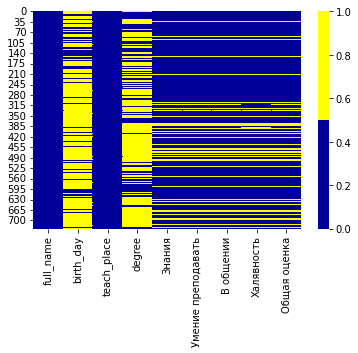

In [79]:
import seaborn as sns
#Проверим на наличие пропусков в числовых признаках (оценки)
cols = data.columns[1:10] 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

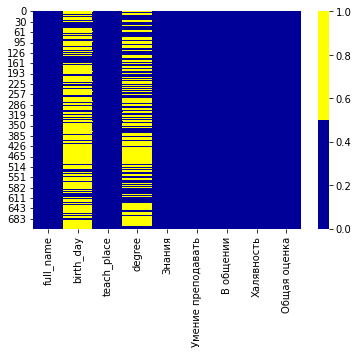

In [80]:
#Убираем строки, в которых есть пропуски по числовым признакам.
chisl = ['Общая оценка','Знания', 'Умение преподавать', 'В общении', 'Халявность']
data.dropna(subset=chisl, inplace = True)
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [81]:
#Выделим нужные колонки и пронормируем
from sklearn.preprocessing import RobustScaler 
RobustScaler = RobustScaler()

new_data = RobustScaler.fit_transform(data[chisl].values)
new_data


array([[ 0.55605381,  0.52903226,  0.54225352,  0.46956522,  0.50387597],
       [ 0.57399103,  0.07741935,  0.44366197,  0.52173913,  0.9379845 ],
       [ 0.44843049,  0.28387097,  0.23239437,  0.2173913 ,  0.44186047],
       ...,
       [ 0.44843049,  0.28387097,  0.35211268,  0.36521739,  0.69767442],
       [ 0.14349776, -0.02580645,  0.3028169 ,  0.03478261, -0.07751938],
       [-1.04932735, -1.87096774, -0.70422535, -1.08695652, -0.46511628]])

In [82]:
#Алгоритм кластеризации 
from tqdm import tqdm 


def distance(point1, point2): # функция расстояния
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1] - point2[1])**2)

def MyKMeans(X, n_clusters, as_generator=False, n_epochs = 100):
    centroids = X[np.random.choice(list(range(len(X))), n_clusters)] # случайные выбираем точки для центров
#     n_epochs = 100 # кол-во эпох
    
    for _ in tqdm(range(n_epochs)): 
        #1. Cчитаем расстояния до кластеров
        belonging = []
        for sample in X:
            distances = []
            for center in centroids:
                distances.append(distance(sample, center))
            belonging.append(distances)
                
        #2. Определяем принадлежность кластерам
        belonging = np.array(belonging)
        belonging = np.argmin(belonging, axis=1) # позиция минимума
        
        #3. Перерасчитываем центры
        new_centroids = []
        for c in range(n_clusters):
            points = X[belonging==c]
            new_centroids.append(points.mean(axis=0))
        centroids = np.array(new_centroids)
        
        if as_generator:
            yield belonging, centroids # возвращаем генератор
    yield belonging, centroids

In [93]:
y_pred, centers = next(MyKMeans(new_data, 5, n_epochs=10))

100%|██████████| 10/10 [00:00<00:00, 70.26it/s]


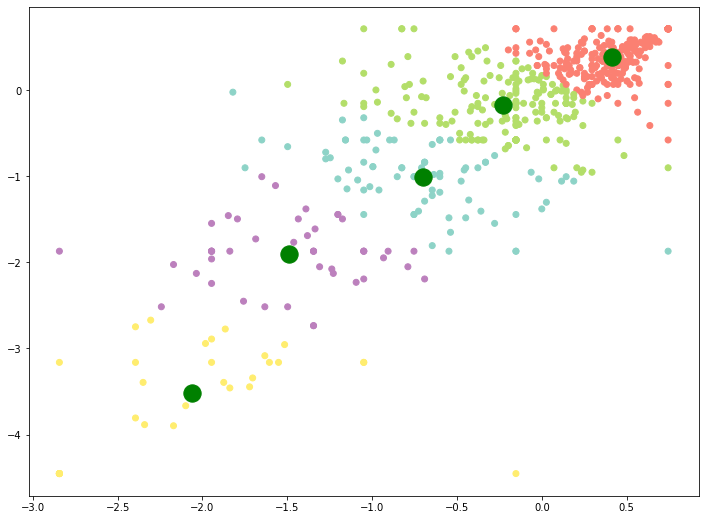

In [94]:
#отрисовываем график на 5 кластеров.

plt.figure(figsize=(12,9))
plt.scatter(new_data[:,0], new_data[:,1], c=y_pred, cmap ='Set3')
plt.scatter(centers[:,0], centers[:,1], c='green', s=300, cmap ='Set3')
plt.show()

In [99]:
#Теперь попробуем сделать 10 кластеров и вывести график.

y_pred, centers = next(MyKMeans(new_data, 10, n_epochs=10))

100%|██████████| 10/10 [00:00<00:00, 39.93it/s]


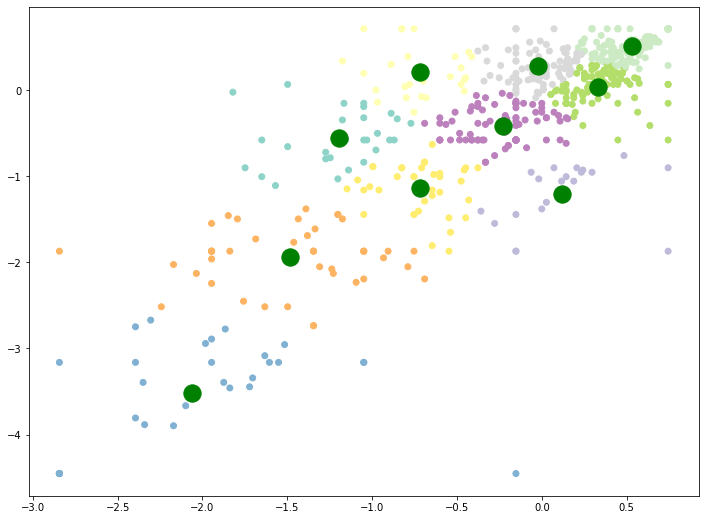

In [100]:
plt.figure(figsize=(12,9))
plt.scatter(new_data[:,0], new_data[:,1], c=y_pred, cmap ='Set3')
plt.scatter(centers[:,0], centers[:,1], c='green', s=300, cmap ='Set3')
plt.show()